-26.78490448


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


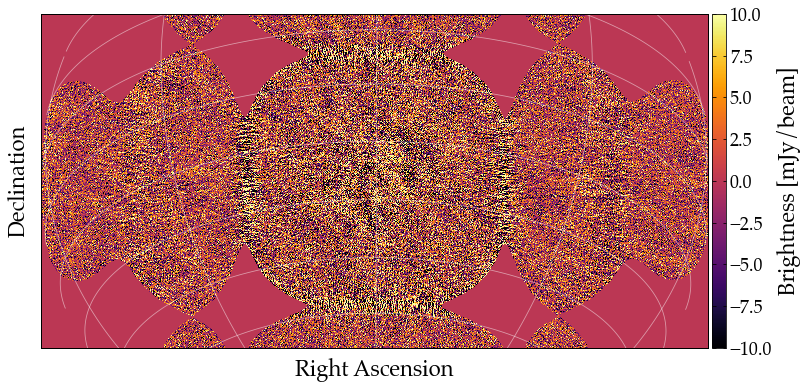

In [52]:
#!/usr/bin/env python
import numpy as np
from astropy.io import fits
import astropy.constants as const
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import EarthLocation
from astropy.wcs import WCS
import pylab as pl
import aplpy
from matplotlib.colors import ListedColormap
import matplotlib
from matplotlib import rc
rc('text', usetex=False)
rc('font',**{'family':'serif','serif':['Palatino']})
import matplotlib as mpl
from matplotlib.colors import ListedColormap
from matplotlib import colors
from matplotlib import cm
import glob
from astropy import wcs
from astropy.cosmology import LambdaCDM
import os
import subprocess as sp
from matplotlib.ticker import MaxNLocator


my_cosmo = LambdaCDM(67.8, 0.308, 0.692)
str_to_beam = (0.0559529*(np.pi/180))**2

dir1 = '/Users/nicholebarry/'
dir2 = '/Users/nicholebarry/'
#dir3 = '/Users/nabarry/MWA/data/kernel_sims/regbeam/'
d_type = 'Residual'
weighting = 'uniform_'
stokes = 'YY'
fitslist = [dir1+'1088285600_uniform_Residual_YY_GLEAM_without_gp.fits',
            dir1+'1088285600_uniform_Residual_YY._regbeam.fits',
            dir1+'1088285600_uniform_Residual_YY_EDA2_2.fits',
            dir2+'1088285600_uniform_Residual_YY_gppygdsm.fits']#,
            #dir3+'1061316296_'+weighting+d_type+'_'+stokes+'.fits']
for f in fitslist:
    fh = fits.getheader(f)
    fd = fits.getdata(f)

    hitems = ['PC1_3','PC1_4','PC2_3','PC2_4','PC3_1','PC3_2','PC3_3','PC3_4','PC4_1','PC4_2','PC4_3','PC4_4',\
        'CRPIX4','CDELT4','CRVAL4','CTYPE4','CRPIX3','CDELT3','CRVAL3','CTYPE3','CUNIT3','NAXIS4','NAXIS3','CUNIT4']##

    for hi in hitems:
        try:
            fh.remove(hi)
        except:
            pass
    fh.set('NAXIS',2)
    fh.set('WCSAXES',2)

    fits.writeto(f.replace('.fits','.2ax.fits'),\
        #fd[:,:], header=fh, overwrite=True)
        fd[:,:]*str_to_beam*1000., header=fh, overwrite=True)


# Get image centre coordinates
fh = fits.getheader(dir1+'1088285600_uniform_Residual_YY._regbeam.fits')
ra_cent  = fh['CRVAL1']
dec_cent = fh['CRVAL2']
imsz     = 114. #113

print(dec_cent)

vmin=-10
vmax=10
cmap='inferno'#'gnuplot2'#

# Plot a 1x3 Figure
#fig = pl.figure(figsize=(21,8))
fig = pl.figure(figsize=(21,21))
#f1 = aplpy.FITSFigure(dir1+'1088285600_uniform_Residual_YY_GLEAM_without_gp.2ax.fits', figure=fig, subplot=(1,2,1))
f1 = aplpy.FITSFigure(dir1+'1088285600_uniform_Residual_YY_EDA2_2.2ax.fits', figure=fig, subplot=(1,2,1))
f1.recenter(ra_cent, dec_cent, height=imsz/2, width=imsz)
f1.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
f1.axis_labels.set_ytext('Declination')
f1.axis_labels.set_xtext('Right Ascension')
#f1.tick_labels.set_yformat('ddd')
#f1.tick_labels.set_xformat('ddd')
f1.tick_labels.set_font(size=18)
f1.axis_labels.set_font(size=22)
f1.ticks.set_yspacing(10)
f1.ticks.set_xspacing(40)
f1.ticks.hide()
f1.tick_labels.hide()
f1.add_grid()
#f1.tick_labels.hide_x()
#f1.axis_labels.hide_x()
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')
f1.add_colorbar(location='right')
f1.colorbar.set_axis_label_text(r'Brightness [mJy/beam]')
f1.colorbar.set_font(size=18)
f1.colorbar.set_axis_label_font(size=22)
a=pl.gca()
a.tick_params(direction='in', color='k', which='both')


#f2 = aplpy.FITSFigure(dir1+'1088285600_uniform_Residual_YY_GLEAM_without_gp.2ax.fits', figure=fig, subplot=(1,2,2))
#f2.recenter(ra_cent, dec_cent, height=imsz/2, width=imsz)
#f2.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
#f2.axis_labels.set_ytext('Declination (J2000)')
#f2.axis_labels.set_xtext('Right Ascension (J2000)')
#f2.tick_labels.set_yformat('dd')
#f2.tick_labels.set_xformat('hh:mm')
#f2.axis_labels.set_font(size=22)
#f2.tick_labels.set_font(size=18)
#f2.axis_labels.hide_y()
#f2.tick_labels.hide_y()
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')
#f2.add_colorbar(location='right')
#f2.colorbar.set_axis_label_text(r'Brightness [Jy/beam]')
#f2.colorbar.set_font(size=18)
#f2.colorbar.set_axis_label_font(size=22)
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')

#f3 = aplpy.FITSFigure(dir3 + '1061316296_'+weighting+d_type+'_'+stokes+'.2ax.fits', figure=fig, subplot=(1,3,3))
#f3.recenter(ra_cent, dec_cent, height=imsz, width=imsz)
#f3.show_colorscale(cmap=cmap, stretch='linear',vmin=vmin,vmax=vmax)
#f3.axis_labels.set_ytext('Declination (J2000)')
#f3.axis_labels.set_xtext('Right Ascension (J2000)')
#f3.tick_labels.set_yformat('dd')
#f3.tick_labels.set_xformat('hh:mm')
#f3.axis_labels.set_font(size=14)
#f3.tick_labels.set_font(size=12)
#f3.axis_labels.hide_y()
#f3.tick_labels.hide_y()
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')
#f3.add_colorbar(location='top')
#f3.colorbar.set_axis_label_text(r'Brightness [Jy/beam]')
#f3.colorbar.set_font(size=12)
#f3.colorbar.set_axis_label_font(size=14)
#a=pl.gca()
#a.tick_params(direction='in', color='k', which='both')

pl.tight_layout()
pl.savefig('/Users/nicholebarry/galactic_plane_EDA2.png', bbox_inches='tight', dpi=128)